## 4, 모델 훈련

훈련 알고리즘이 어떻게 작동하는 지 알아야 하이퍼파라미터 빨리 찾기, 디버닝, 에러 분석에 유리함

모델 훈련 방법
- 직접 계산할 수 있는 공식을 이용
- 경사하강법(GD)을 이용하여 모델 파라미터를 조금씩 바꾸면서 비용 최소화
    - 배치 경사하강법, 미니배치 경사하강법, 확률적 경사하강법
***

### 4.1 선형 회귀

입력 특성의 가중치 합과 편향이라는 상수를 더해 예측

\begin{equation*}
\hat{y} = \theta_1x_1+\theta_2x_2+\dots+\theta_nx_n
\end{equation*}

$ \hat{y}$은 예측값

n은 특성의 수

$ x_i $는 i번째 특성값

$\theta_j$는 j번째 모델 파라미터
***

벡터형태로 표현하면,
\begin{equation*}
\hat{y} = h_\theta(\mathbf{x}) = \theta^T \cdot \mathbf{x}
\end{equation*}

$\theta$는 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$ 까지의 특성 가중치를 담고 있는 모델의 파라미터 벡터

$\theta^T$는 $\theta$의 전치(transpose)

$\mathbf{x}$는 $x_0$에서 $x_n$까지 담고 있는 샘플의 특성 벡터, $x_0$은 항상 1임

$\theta^T \cdot \mathbf{x}$는 $\theta^t$와 \mathbf{x}의 점곱(dot product)

$h_\theta$는 모델 파라미터 $\theta$를 사용한 가설(hyponesis)함수
***

훈련이란? 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

훈련세트 $\mathbf{X}$에 대한 선형 회귀 가설 $h_\theta$의 MSE(Mean Squaer Error) 계산

\begin{equation*}
MSE(\mathbf{X},h_\theta) = \frac1m \sum_{i=1}^m(\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)})
\end{equation*}

$MSE(\mathbf{X},h_\theta)$는 편의상 $MSE(\theta)$로 표기
***

### 4.1.1 정규방정식

$\theta$를 찾기위한 해석적인 방법(수학공식) -> 정규방정식

\begin{equation*}
\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}  
\end{equation*}

$\hat{\theta}$은 비용 함수를 최소화하는 $\theta$값

$\mathbf{y}$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타겟 벡터

In [8]:
import numpy as np

X = 2 * np.random.rand(100, 1)  #uniform
y = 4 + 3 * X + np.random.randn(100, 1)   # gaussian
X[0:3], y[0:3]

(array([[ 0.21957263],
        [ 0.90966483],
        [ 1.55209585]]), array([[ 5.37036913],
        [ 8.11717049],
        [ 8.89946958]]))

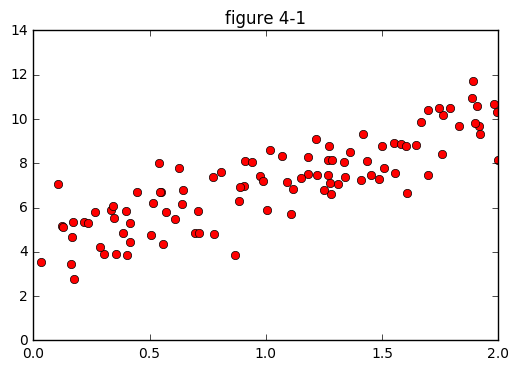

In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline
plt.title("figure 4-1")
plt.axis([0,2,0,14])
plt.plot(X,y, 'ro')

In [28]:
X_b = np.c_[np.ones((100,1)),X]
X_b[0:2]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best #정규방정식의 헤

array([[ 3.99668887],
       [ 2.92927589]])

$\theta_0$ = 4와 $\theta_1$ = 3을 예상했지만 $\theta_0$ = 3.996와 $\theta_1$ = 2.929 나옴

노이즈때문에 정확히 재현하지 못함

$\hat{\theta}$을 사용한 예측

In [33]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99668887],
       [ 9.85524065]])

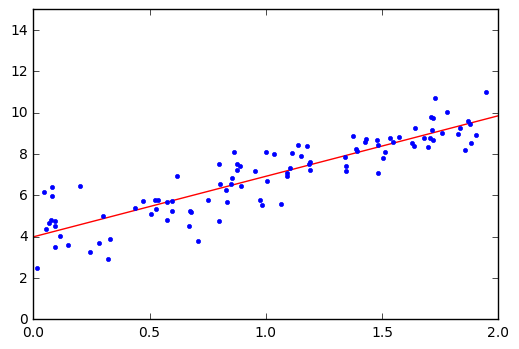

In [34]:
#모델의 예측을 그래프에 나타내봄
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [38]:
#사이킷런 코드
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.99668887],
       [ 9.85524065]])

***
### 4.1.2 계산복잡도
정규방정식은 (특성 수 + 1) * (특성 수 + 1) 의 역행렬 계산해야됨. 특성 수 많아지면 매우 느려짐

***
### 4.2. 경사하강법
비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

짙은 안개 속에서 길을 잃었다면 가장 가파른 길을 따라 아래로 내려가야 집에 갈 수 있음

파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그래디언트를 계산함 ($\theta$는 랜덤으로 초기화)

<img src="https://drive.google.com/uc?id=1Wq6ztUbnvV8upxK3nxeLLPSKTHhe7_vR" width="500" alt="그림 4-3 경사하강법">
그래디언트가 감소하는 방향으로 이동, 그래디언트가 0이 되면 최소값!!

<img src="https://drive.google.com/uc?id=1eyC0dPAXgK7unjFBVT6CyLdCnSgTbU-L" width="500" alt="그림 4-4 학습률이 너무 작을때">
스텝의 크기 = 학습률
수렴 시간이 너무 오래 걸림

<img src="https://drive.google.com/uc?id=1LhITIPi1R4QWs-ObJfpZ2BscV1Wy7bgg" width="500" alt="그림 4-5 학습률이 너무 클때">
그래디언트가 감소하는 방향으로 이동했지만 비용이 더 커졌음

<img src="https://drive.google.com/uc?id=1WEfq9FZPoRZfWnLw0JzX0d04yHt8y7x_" width="500" alt="그림 4-6 경사하강법의 문제점">
전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴
MSE는 볼록 함수 (하나의 전역 최솟값), 연속 함수이므로 경사하강법을 이용해 전역 최솟값을 근접하게 구할 수 있음

<img src="https://drive.google.com/uc?id=19jSsSA16MdWBbO_wq4an-pZaywyNEpV- " width="500" alt="그림 4-7 특성 스케일에 따른 경사하강법">
왼쪽은 스케일이 같은 훈련세트
오른쪽은 특성 1이 특성 2보다 더 작은 훈련세트
모든 특성이 같은 스케일을 갖도록 만들어야 함
사이킷런의 StandardScaler, (x-평균) / 표준편차 -> 평균을 0으로, 분산을 1로 만듦


### 4.2.1 배치 경사 하강법
경사하강법 -> 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트 계산

$\theta_j$가 조금 변경되 때 비용 함수가 얼마나 바뀌는지 계산(편도함수, partial derivative)

동쪽을 바라봤을때 발밑에 느껴지는 산의 기울기, 북쪽은? (모든 차원에 대해 반복)

파라미터 $\theta_j$에 대한 비용함수의 편도함수 
\begin{equation*}
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac2m \sum_{i-1}^m (\theta^T \cdot \mathbf{x^{(i)}} - \mathbf{y^{(i)}})x_j^{(i)}
\end{equation*}

편도함수를 각각 계산하는 대신 한꺼번에 계산할 수도 있음
\begin{equation*}
\bigtriangledown_\theta MSE(\theta) =  \begin{pmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta) \\ \frac{\partial}{\partial \theta_1}MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n}MSE(\theta) \end{pmatrix} = \frac2m \mathbf{X^T} \cdot (\mathbf{X} \cdot \theta - y)
\end{equation*}


$\mathbf{X}$는 샘플 수 m, 특성 수 n인 $m \times n$ 행렬

$\theta$ 는 $n \times 1$ 벡터 , 위 식의 결과도 파라미터 개수와 같은 $n \times 1$ 벡터가 됨 

위 공식은 배치 경사 하강법, 전체 훈련 세트 $\mathbf{X}$에 대해 계산하므로 매우 큰 훈련 세트에서 아주 느림

그래디엔트 벡터가 구해지면 반대 방향으로 가도록 빼줌

$\theta$ 에서 $\bigtriangledown_\theta MSE(\theta)$ 를 뺌

스텝의 크기를 결정하기 위해 크레디언트 벡터에 학습률 $\eta$ 를 곱함

\begin{equation*}
\theta^{(next step)} = \theta - \eta \bigtriangledown_\theta MSE(\theta)
\end{equation*}

In [50]:
#경사 하강법의 스텝 구현
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta


array([[ 3.99668887],
       [ 2.92927589]])

<img src="https://drive.google.com/uc?id=1W50KfdYC--Is1CXN4jVo4MdFcPw6RLrQ" width="500" alt="그림 4-8 여러 가지 학습률에 대한 경사 하강법">

학습률과 반복횟수
왼쪽은 학습률이 너무 낮음, 시간 오래 걸림
중간은 적당함
오른쪽은 너무 커서 발산

반복횟수가 너무 작으면 최적 이전에 멈춤, 많으면 시간 낭비

반복횟수를 아주 크게 지정하고 벡터의 노름이 어떤 값 $\epsilon$ (허용오차)보다 작아지면 경사 하강법이 최소값에 도달한 것으로 보고 알고리즘 중지
***

### 4.2.2 확률적 경사 하강법

매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산
장점 - 빠름, 매우 큰 훈련 세트도 훈련 가능, 지역 최솟값 건너 뛸 수도 있음
단점 - 불안정함, 알고리즘 멈출 때 최적치는 아닐 수 있음

<img src="https://drive.google.com/uc?id=10kbQkG48TfNz2z4C6dus7BuqS47A_X-9" width="500" alt="그림 4-9 확률적 경사 하강법">

학습 시작할 때는 학습률 크게 하고 점점 줄여 전역 최솟값에 도달하도록 함(annealing, 담금질)

매 반복에서 학습률 결정 (학습 스케쥴)

In [74]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터
eta = 0.1
m = 100 #반복횟수

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients   
theta

array([[ 3.99668887],
       [ 2.92927589]])

<img src="https://drive.google.com/uc?id=1cqX3MK4S5EPX5aqFSbWdSOn8xtzPUrq9" width="500" alt="그림 4-10 확률적 경사 하강법의 첫 20개 스텝">

샘플 무작위 선택이므로 어떤 샘플은 선택안될 수도 있음.
모든 샘플 섞은 후 하나씩 선택해서 전부 사용할 수도 있지만 보통 더 늦게 수렴됨

In [87]:
#사이킷런에서 SGD방식으로 선형회귀
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel()) # ravel() - Return a contiguous flattened array.
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.98548514]), array([ 2.92511543]))

### 4.2.3 미니배치 경사 하강법
전체나 하나씩 하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트 계산
장점 - 행렬 연산에 최적화된 GPU로 성능 향상 가능, 덜 불규칙적

<img src="https://drive.google.com/uc?id=1wG87lk-AbSrtlOI6ehu4vDuHn7HokmBh" width="500" alt="그림 4-11 파라미터 공간에 표시된 경사 하강법의 경로">

<img src="https://drive.google.com/uc?id=16NQKFYMm_IsLVSHo4Hfy2Un3F7h4_vhI" width="500" alt="표 4-1 선형 회귀를 사용한 알고리즘 비교">

***

### 4.3 다항 회귀


비선형 데이터를 학습할 때도 선형 모델 사용할 수 있음 (특성의 거듭제곱 같은 것을 추가)

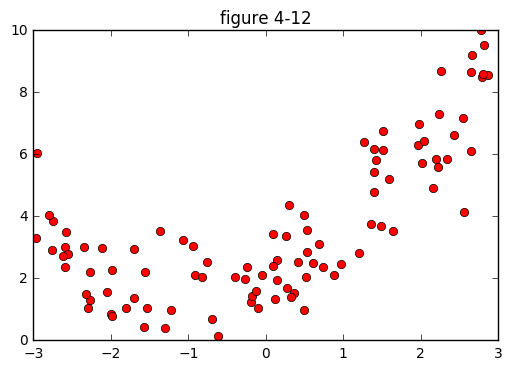

In [123]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline
plt.title("figure 4-12")
plt.axis([-3,3,0,10])
plt.plot(X,y, 'ro')

In [95]:
#원래 특성에 제곱(2차 다항)하여 새로운 특성 추가하는 예제
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[ 0.38882803]
[ 0.38882803  0.15118724]


In [96]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.99425019]), array([[ 0.94323053,  0.49582598]]))

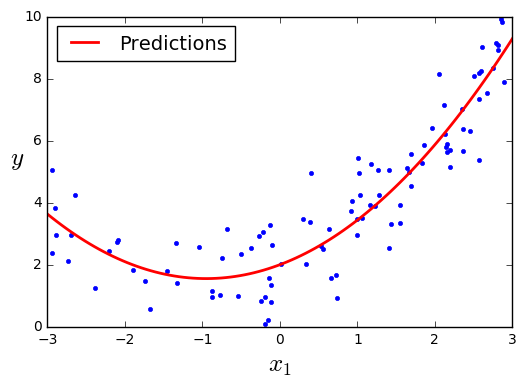

In [101]:
#start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

원래 함수는 $y=0.5x_1^2 + 1.0x_1 + 2.0 +$가우시안 잡음인데, 예측된 모델은 $\hat{y}=0.56x_1^2 + 0.93x_1 + 1$ 이므로 나쁘지 않음

PolynomialFeatures는 특성이 2개일 때 degree가 3이면 $\frac{(n + d)!}{d!n!}$개로 변환됨

$(a,b)$ -> $(1,a,b,a^2,a^3,b^2,b^3,ab,a^2b,ab^2)$

### 4.4 학습곡선
고차 다항 회귀를 적용하면 보통의 선형 회귀보다 더 구불구불한 모양
과대적합됨

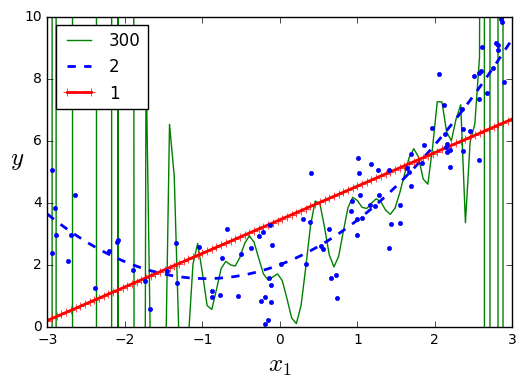

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

모델의 일반화 성능 추정 방법
1. 훈련데이터에서는 성능 좋은데 테스트에서 안좋음
2. 학습 곡선 (훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시킴)

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    

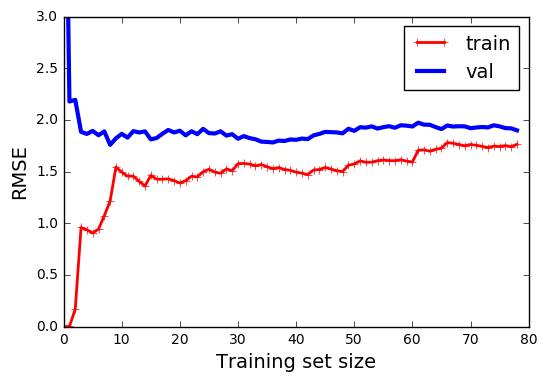

In [145]:
#과소적합 예
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show() 

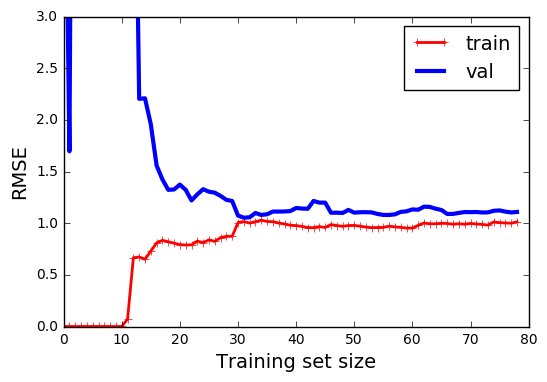

In [146]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show() 

degree를 10으로 올려서 학습함.

학습곡선의 차이점
1. 훈련 데이터의 오차가 선형 회귀모델보다 훨씬 낮아짐
2. 두 곡선 사이의 공간이 크고 더 많은 훈련데이터를 추가하면 두 곡선이 점점 가까워짐

편향/분산 트레이트오프

모델의 일반화 오차는 3가지 다른 종류의 오차의 합으로 표현할 수 있음

1. 편향
잘못된 가정으로 인한 것 - 실제 2차인데 선형으로 가정했다거나..
편향이 큰 모델을 훈련 데이터에 과소적합되기 쉬움

2. 분산
작은 변동에 모델이 과도하게 민감함
자유도가 높은 모델(예, 고차 다항 회귀)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향 

3. 줄일 수 없는 오차
데이터 자체의 노이즈, 제거하지 않는 이상 줄일 수 없음 (고장난 센서)

일반적으로 모델 복잡도가 커지면 분산이 늘어나고 편향이 줄어듦

### 4.5 규제가 있는 선형 모델

과대적합을 감소시키기 위해 모델을 규제

***

### 4.5.1 릿지 회귀

Ridge 산등성이

규제가 추가된 선형 회귀 버전

규제항 $\alpha \sum_{i=1}^n \theta_i^2$ 이 비용 함수에 추가됨 (훈련하는 동안에만)

$\alpha = 0$ 일 경우 일반 선형 회귀와 같아짐

$\alpha$ 가 아주 클 경우 모든 가중치가 거의 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨

\begin{equation*}
\mathrm{J}(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \theta_i^2
\end{equation*}

i = 1인 이유는 bias는 규제에 포함되지 않기 때문

w를 특성의 가중치 벡터 ($\theta_1 ~ theta_n $) 라고 정의하면 규제항은 $ \frac12(\rVert w\rVert_2)^2$, $ \frac12$은 미분 결과 간단하게 만들려고 추가

경사 하강법 적용 시 MSE 그래디언트 벡터에 $ \alpha w$를 더하면 됨

릿지는 입력 스케일에 민감해서 StandardScaler로 scaling함

$ \alpha $가 커질수록 직선에 가까워짐

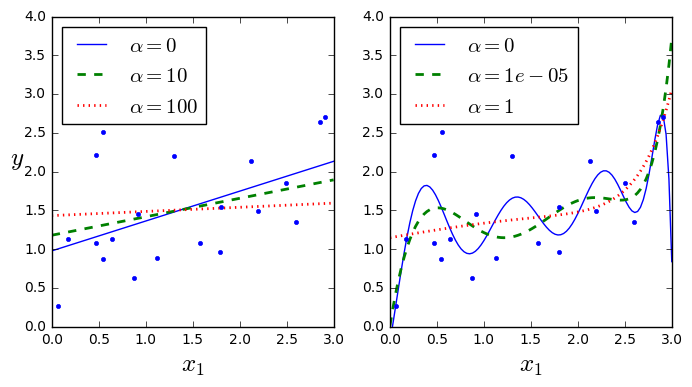

In [164]:
#릿지 규제를 사용한 다항 회귀 예제
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

정규방정식을 사용하거나, 확률적 경사 하강법을 사용한 릿지 회귀 가능


\begin{equation*}
\hat{\theta} = (\mathbf{X^T} \cdot \mathbf{X} + \alpha \mathbf{A})^{-1} \cdot \mathbf{X^T} \cdot \mathbf{y}
\end{equation*}


In [154]:
#정규방정식
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

In [159]:
#SGD
sgd_reg = SGDRegressor(n_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([[ 1.5507201]])

In [160]:
#SGD 현재 그래디언트와 이전 스텝의 모든 그래디언트을 합해서 평균한 값으로 모델 파라미터 갱신
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.5507201]])

### 4.5.2 라쏘 회귀

$라쏘^{Least \ Absolute \ Shrinkage \ and \ Selection \ Operator} (Lasso) 회귀$

$\ell_2 $노름 제곱을 2로 나눈 것 대신 가중치 벡터의 $\ell_1 $ 노름 사용


\begin{equation*}
\mathrm{J}(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \vert \theta_i \vert 
\end{equation*}

라쏘의 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점

아래 그래프에서 높은 차수의 특성 가중치가 0이 되어 거의 선형적으로 보임

자동으로 특성 선택을 하고 희소 모델을 만듦 (대부분 가중치가 0이 됨)

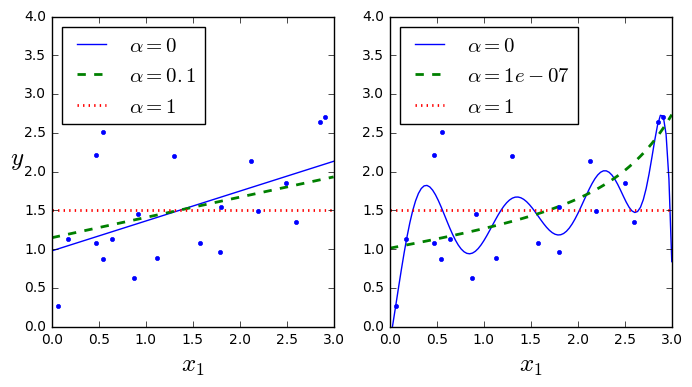

In [162]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

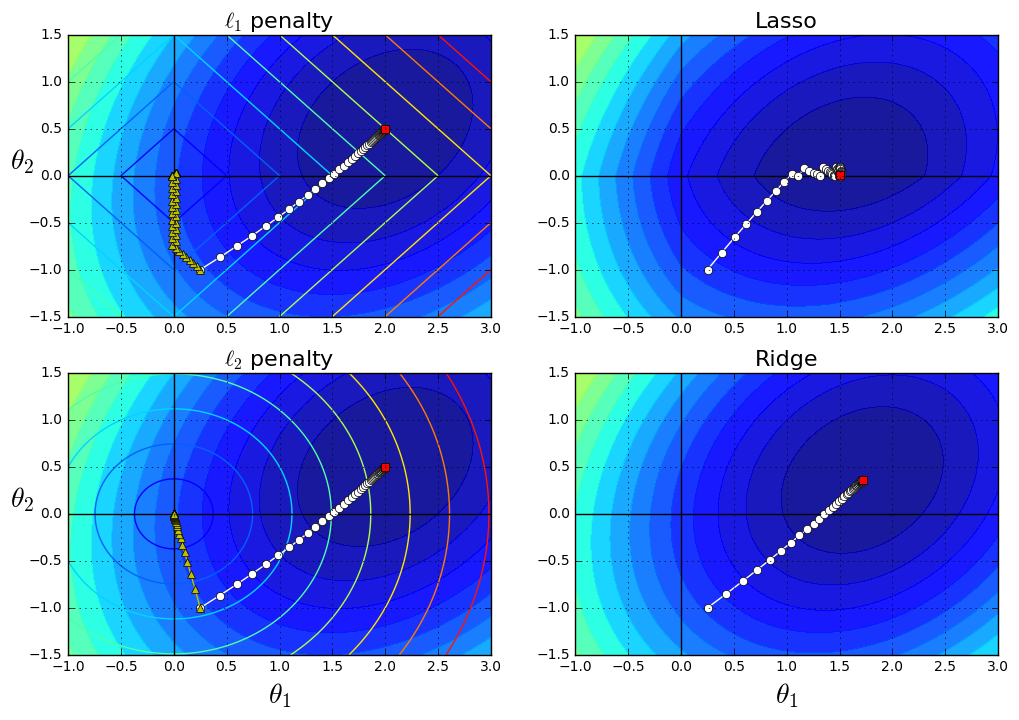

In [180]:
#Lasso vs Ridge
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)

T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 100):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

위 그래프는 Lasso, 아래 그래프는 Ridge

왼쪽 위 그래프 - 배경의 등고선은 규제가 없는($\alpha = 0$) MSE 비용 함수

하얀색 원은 비용 함수에 대한 배치 경사 하강법의 경로

전방의 등고선(다이아몬드 형태)은 $\ell_1$ 패널티, 삼각형은 이 페널티에 대한($\alpha \to \infty $) 배치 경사 하강법


오른쪽 위 그래프 - 배경의 등고선은 규제 ($\alpha = 0.5$) MSE 비용 함수

$\theta_2 = 0$ 가 거의 0이 됨

오른쪽 아래 그래프는 $\ell_2$ 패널티 적용한 것

파라미터가 규제없는 모델 보다는 조금씩 더 작지만 완전히 제거되지는 않음

라쏘 비용함수는 $\theta_i = 0$ 에서 미분 가능하지 않기 때문에 서브그래디언트 벡터 사용(불가능한 지점 근방 그래디언트의 중간값)

\begin{equation*}
\mathrm{g}(\theta, \mathrm{J}) = \bigtriangledown_\theta MSE(\theta) + \alpha \begin{pmatrix} sign(\theta_1) \\ sign(\theta_2) \\ \vdots \\ sign(\theta_n) \end{pmatrix} \  여기서 sign(\theta_i) = \begin{cases} -1, & \theta < 0일 때 \\ 0, & \theta = 0일 때 \\ 1, & \theta > 0일 때 \end{cases}
\end{equation*}

In [181]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

### 4.5.3 엘라스틱넷

릿지와 라쏘를 절충한 모델

릿지와 라쏘의 규제항을 단순히 더한 것에 혼합 비율 r을 사용해 조절

r = 0이면 릿지와 같고 r=1이면 라쏘와 같음

보통 릿지가 사용되지만 쓸모있는 특성이 몇 개밖에 없는 것 같다면 라쏘나 엘라스틱넷 고려

특성 수가 훈련 샘플보다 많거나 특성 몇개가 강하게 연관이 있다면 라쏘 보다는 엘라스틱넷 고려

In [182]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

***
### 4.5.4 조기 종료

검증 에러가 최솟값에 도달하면 훈련 중지. 조기종료$^{early \ stopping} $

검증 에러가 최솟값에 도달했다가 상승하는 데 이는 과대적합을 의미함

SGD나 미니배치 경사 하강법의 경우 곡선이 매끄럽지 않은데 이럴때는 일정 시간 동안 최솟값보다 클 때 멈춤


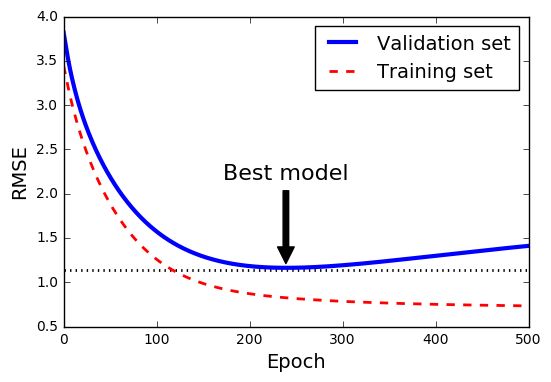

In [185]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [187]:
#조기 종료를 위한 코드
#warm-start=True로 지정
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [188]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, verbose=0, warm_start=True))

### 4.6 로지스틱 회귀 

분류를 위한 회귀 알고리즘

샘플이 특정 클래스에 속할 확률을 추정

추정 확률이 50%가 넘으면 해당 클래스에 속한다고 예측 (이진 분류기)

### 4.6.1 확률 추정

선형회귀 결과값의 로지스틱을 출력


\begin{equation*}
\hat{p} = \mathbf{h_\theta}(\mathbf{x}) = \sigma(\theta^T \cdot \mathbf{x})
\end{equation*}

$\sigma(\cdot)$ 는 0과 1사이의 값을 출력하는 시그모이드 함수

\begin{equation*}
\sigma(t) = \frac{1}{1+exp(-t)}
\end{equation*}


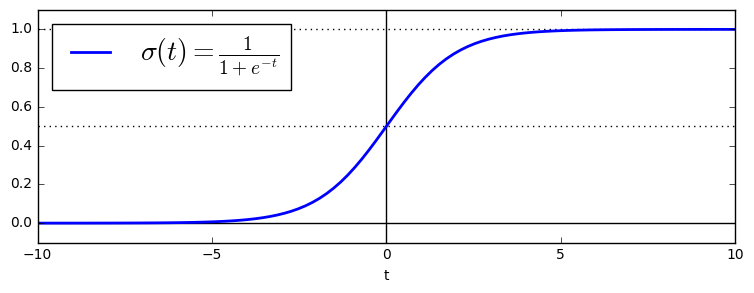

In [189]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### 4.6.2 훈련과 비용함수

훈련의 목적은 양성 샘플에 대해서는 높을 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 파라미터 벡터 $\theta$를 찾는 것

하나의 훈련 샘플에 대한 비용 함수

\begin{equation*}
c(\theta) = \begin{cases} -log(\hat{p}), & y = 1일 때 \\ -log(1-\hat{p}), & y = 0일 때 \end{cases}
\end{equation*}

t가 0에 가까워지면 -log(t)가 매우 커짐, 양상 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가함

전체 훈련 세트에 대한 비용 함수

\begin{equation*}
J(\theta) = -\frac{1}{m}\sum_{i=1}^m [ y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]
\end{equation*}

이거는 정규방정식없음
비용 함수가 볼록 함수이므로 경사하강법이 전역 최소값을 찾는 것을 보장
j번째 모델 파라미터 $\theta_j$ 에 대한 편미분
\begin{equation*}
\frac {\partial }{\partial \theta_j} J(\theta) = -\frac{1}{m}\sum_{i=1}^m ( \sigma ( \theta^T \cdot \mathbf x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation*}

### 4.6.3 결정 경계

<img src="https://drive.google.com/uc?id=1uW5V5V77jzWYeE1AqfIdl2fxJAg4vF0T" width="500" alt="그림 4-22 세 종류의 붓꽃">

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 로지스틱 분류기 만들기

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [208]:
X = iris["data"][:, 3:]  # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [209]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

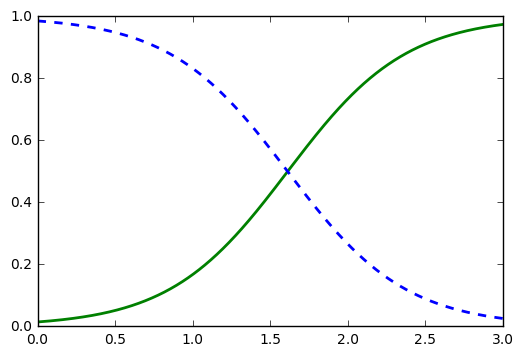

In [210]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

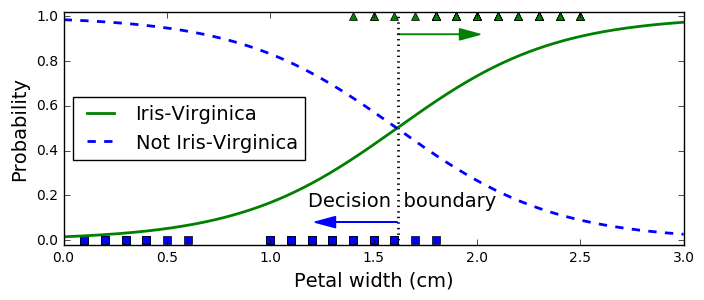

In [211]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

Virginica의 꽃잎 너비는 1.4~2.5에 분포, 나머지는 0.1~1.8에 분포

2cm 넘으면 Virginica일 확률이 매우 높음

In [214]:
print(decision_boundary)
print(log_reg.predict([[1.7], [1.5]]))

[ 1.61561562]
[1 0]


In [4]:
#꽃잎 너비와 꽃잎 길이 두개의 특성으로 추정

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

NameError: name 'np' is not defined

### 4.6.4 소프트맥스 회귀

다중 클래스 문제 해결

소프트맥스 회귀 혹은 다항 로지스틱 회귀

각 클래스 k에 대한 점수 $s_k(x)$ 를 계산하고 그 점수에 소프트맥스 함수 적용하여 확률 추정

클래스 k에 대한 소프트맥스 점수


\begin{equation*}
s_k(x) = (\theta^{(k)})^T \cdot \mathbf x
\end{equation*}

각 클래스는 자신만의 파라미터벡터 $\theta^{(k)}$ 가 있음.

소프트맥스 함수로 클래스 k에 속할 확률 $\hat{p}_k$ 추정 (지수 함수를 적용한 후 정규화)

\begin{equation*}
\hat{p}_k = \sigma (s(\mathbf x))_k = \frac{exp(s_k(\mathbf x))}{\sum_{j=1}^K exp(s_j(\mathbf x))}
\end{equation*}

K는 클래스 수
$s(\mathbf x)$는 샘플 $\mathbf x$에 대한 각 클래스의 점수를 담고 있는 벡터

$\sigma (s(\mathbf x))_k$는 샘플 $\mathbf x$ 가 클래스 k에 속할 확률

추정 확률이 가장 큰 클래스를 선택

\begin{equation*}
\hat{y} = \operatorname*{arg\,max}_k \sigma (s(\mathbf x))_k = \operatorname*{arg\,max}_k s_k(\mathbf x) = \operatorname*{arg\,max}_k ((\theta^{(k)})^T  \cdot (\mathbf x))
\end{equation*}

$\operatorname*{arg\,max}_k$ 는 함수를 최대화하는 변수 k를 반환


모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 하는 것이 목표

크로스 엔트로피 비용 함수

\begin{equation*}
J(\Theta) = -\frac {1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K}y_k^{(i)}log(\hat{p}_k^{(i)})
\end{equation*}

i번째 샘플에 대한 타깃 클래스가 k일때 $y_k^{(i)}$가 1이고, 그 외에는 0임


클래스 k에 대한 크로스 엔트로피의 그래디언트 벡터

\begin{equation*}
\bigtriangledown_{\theta^{(k)}} J(\Theta) = \frac {1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) \mathbf{x^{(i)}}
\end{equation*}

미분 공식은 여기 참고
https://ratsgo.github.io/deep%20learning/2017/10/02/softmax/


In [13]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

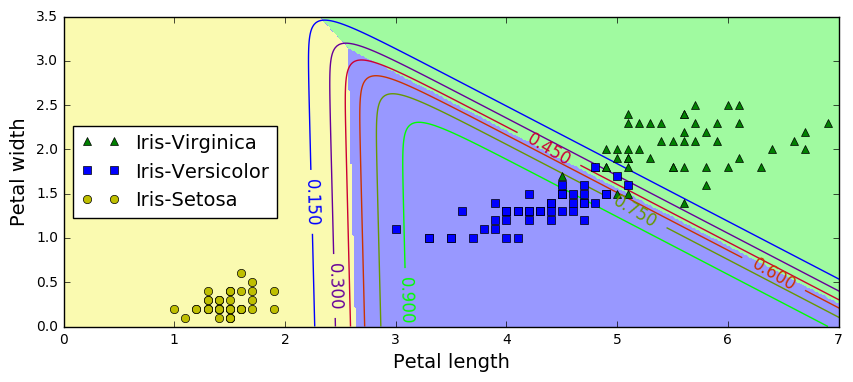

In [23]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)


plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()

#Iris-Versicolor클래스에 대한 확률 곡선

끝
<img src="https://drive.google.com/uc?id=1loFMDr2YaCAhCkv4oiPza8pTm2cdfHZb">